#Data Science test

Ce document décrit la deuxième partie de la solution du deuxième problème listé dans les documents "test.pdf", le cahier est divisé en plusieurs parties :

   * Problèmes 2 : Extraction d'informations basée sur des données non structurées, dans ce cas, les informations à extraire sont les valeurs de TTC.



In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import translate
import multiprocessing
import xgboost as xgb
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import pickle

C:\Users\othmane_fathallah\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
fr_stop_words = [
 'à'
 'au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'sous',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'eu',
 'eue',
 'eues',
 'eus',
 'ai',
 'as',
 'avons',
 'avez',
 'ont',
 'aurai',
 'auras',
 'aura',
 'aurons',
 'aurez',
 'auront',
 'aurais',
 'aurait',
 'aurions',
 'auriez',
 'auraient',
 'avais',
 'avait',
 'avions',
 'aviez',
 'avaient',
 'eut',
 'eûmes',
 'eûtes',
 'eurent',
 'aie',
 'aies',
 'ait',
 'ayons',
 'ayez',
 'aient',
 'eusse',
 'eusses',
 'eût',
 'eussions',
 'eussiez',
 'eussent'
]

In [3]:
letters = 'abcdefghijklmnopqrstuvwxyz'

In [6]:
df = pd.read_csv("test.csv", sep=",")

In [7]:
df["label"] = df["label"].apply(lambda x: x.replace(",", "."))
df["label"] = df["label"].astype(float)
df["label"] = df["label"].apply(lambda x: round(x,1))

In [8]:
df = df[df['sentence'].notnull()]
df['sentence'] = df['sentence'].astype(str)
df["sentence"] = df["sentence"].str.lower()

In [10]:
df["sentence"] = df["sentence"].apply(lambda x: x.rstrip())
df["sentence"] = df["sentence"].apply(lambda x: x.lstrip())
df["sentence"] = df["sentence"].apply(lambda x: x.lstrip("0.00"))

In [11]:
df['sentence'] = df['sentence'].str.replace("h.t", 'ht')
df['sentence'] = df['sentence'].str.replace("t.t.c", 'ttc')
df['sentence'] = df['sentence'].str.replace("t.v.a", 'tva')

<ipython-input-11-a42371fb443e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace("h.t", 'ht')
<ipython-input-11-a42371fb443e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace("t.t.c", 'ttc')
<ipython-input-11-a42371fb443e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace("t.v.a", 'tva')


In [12]:
df["sentence"] = df["sentence"].apply(lambda x: x.replace("," ,"."))

In [13]:
df['sentence'] = df['sentence'].str.replace(r"\b" + "va" + r"\b", 'tva')
df['sentence'] = df['sentence'].str.replace(r"\b" + "cotal" + r"\b", 'total')
df['sentence'] = df['sentence'].str.replace(r"\b" + "soustotal" + r"\b", 'sous total')

<ipython-input-13-34cd51738a98>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r"\b" + "va" + r"\b", 'tva')
<ipython-input-13-34cd51738a98>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r"\b" + "cotal" + r"\b", 'total')
<ipython-input-13-34cd51738a98>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(r"\b" + "soustotal" + r"\b", 'sous total')


In [14]:
fr_accent = list("éèàêç")

In [15]:
df['sentence'] = df['sentence'].str.replace("é", 'e')
df['sentence'] = df['sentence'].str.replace("è", 'e')
df['sentence'] = df['sentence'].str.replace("ê", 'e')
#df['sentence'] = df['sentence'].str.replace("à", 'a')
df['sentence'] = df['sentence'].str.replace("ç", 'c')

In [16]:
for stop_word in fr_stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['sentence'] = df['sentence'].str.replace(regex_stopword, ' ')
    df['sentence'] = df['sentence'].apply(lambda x: x.split())
    df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x]))

<ipython-input-16-98aaf6827679>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace(regex_stopword, ' ')


In [17]:
punctuation_signs = list("#{}()[|=+]:,;^~'_-%`@$¤£^¨*µù%!§/")

In [18]:
for punct_sign in punctuation_signs:
    df['sentence'] = df['sentence'].str.replace(punct_sign, ' ')

<ipython-input-18-8013ab368956>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['sentence'] = df['sentence'].str.replace(punct_sign, ' ')


In [19]:
df["sentence"] = df["sentence"].apply(lambda x: x.replace("sad", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("dhs", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("hs", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("dh", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("mad", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("dirhams", ""))
df["sentence"] = df["sentence"].apply(lambda x: x.replace("dirham", ""))

In [20]:
unwanted_words = ['sainter', 'chaquinter', 'esarl', 'inter', 'osall', 'sain', 'or', 'var', 'vices', 'assistance', 'oocentimes', 'stier'] 

In [21]:
for word in unwanted_words:
    df["sentence"] = df["sentence"].apply(lambda x: x.split())
    df["sentence"] = df["sentence"].apply(lambda x: [e for e in x if e not in unwanted_words])
    df["sentence"] = df["sentence"].apply(lambda x: [e for e in x if len(e)>=2])
    df["sentence"] = df["sentence"].apply(lambda x: [e for e in x if not e.startswith(".")])
    df["sentence"] = df["sentence"].apply(lambda x: " ".join(x))

In [22]:
df["numerical_values"] = df["sentence"].apply(lambda x: x.split())
df["numerical_values"] = df["numerical_values"].apply(lambda x: [e for e in x if any(char for char in e if char.isdigit())])
df["numerical_values"] = df["numerical_values"].apply(lambda x: [e.translate({ord(i): None for i in letters}) for e in x])
df["numerical_values"] = df["numerical_values"].apply(lambda x: [float(e) for e in x])
df["numerical_values"] = df["numerical_values"].apply(lambda x: [e for e in x if e!=0])
df["numerical_values"] = df["numerical_values"].apply(lambda x: [round(e,1) for e in x])

In [23]:
df["len_numerical_values"] = df["numerical_values"].apply(lambda x: len(x))

<AxesSubplot:ylabel='len_numerical_values'>

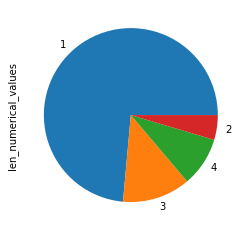

In [24]:
df["len_numerical_values"].value_counts().plot.pie()

In [25]:
indices = []
for ligne in df[["numerical_values", "label"]].itertuples():
    try:
        indices.append(ligne[1].index(ligne[2]))
    except:
        print(ligne)

In [26]:
df["label_index"] = indices

In [27]:
train_tagged = df.apply(lambda r: TaggedDocument(words=word_tokenize(r['sentence']), tags=[r.indice]), axis=1)

In [28]:
model = gensim.models.Doc2Vec.load('doc2vecRound1.model')
%time df["vectors"] = df.apply(lambda x: model.infer_vector(word_tokenize(x['sentence'].replace(';', ''))), axis=1)

Wall time: 384 ms


In [29]:
vector_size = 400
def generateColNames():
    arr = []
    for i in range(vector_size):
        arr.append("keyword" + str(i+1))
    return arr

In [30]:
newCols = generateColNames()

In [31]:
%time df[newCols] = pd.DataFrame(df.vectors.values.tolist(), index=df.index)

Wall time: 166 ms


In [33]:
keyword1Start = 7
dataframeX = pd.concat([df.iloc[:,keyword1Start:vector_size+keyword1Start], df["len_numerical_values"]], axis=1)
dataframeY = df[['label_index']]

In [36]:
model = pickle.load(open("XGBoost Model.pkl", "rb"))

In [43]:
y_pred = model.predict(dataframeX)
predictions = [round(value) for value in y_pred]

In [44]:
predDF = pd.DataFrame()
predDF["predictions"] = predictions

In [45]:
accuracy = accuracy_score(dataframeY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.40%


In [46]:
testResults = pd.concat([df, predDF], axis=1)

In [48]:
isEqual = np.where(testResults["label_index"]==testResults["predictions"], True, False)
testResults["isEqual"] = isEqual

In [49]:
testResults = testResults[['indice', 'sentence', 'label', 'numerical_values',
       'len_numerical_values', 'label_index', 'predictions', 'isEqual']]

In [50]:
testResults.columns

Index(['indice', 'sentence', 'label', 'numerical_values',
       'len_numerical_values', 'label_index', 'predictions', 'isEqual'],
      dtype='object')

In [51]:
testResults.to_excel("testResults(Test_CSV).xlsx", index=None)